In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date']).set_index('date')
# Clean data
df = df[
     (df['value'] >= df['value'].quantile(0.025)) &
     (df['value'] <= df['value'].quantile(0.975))]


def draw_line_plot():
   
    fig , ax = plt.subplots(figsize = (15,5))
    ax.plot(df)
    ax.set_ylabel('Page Views')
    ax.set_xlabel('Date')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    years = df.index.year
    months = df.index.month.sort_values()

    df_bar = df.groupby(by = [years, months])['value'].mean()
    df_bar = df_bar.unstack()
   
    fig = df_bar.plot.bar(xlabel = 'Years').figure
    plt.legend({'January','February','March ','April','May','June','July','August','September','October','November','December'})
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    # Draw box plots (using Seaborn)
    fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axis[0] = sns.boxplot(x = df_box['year'], y = df_box['value'], data = df_box, ax = axis[0])
    axis[1] = sns.boxplot(x = df_box['month'], y = df_box['value'], data = df_box, ax = axis[1], , order =  ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

    axis[0].set_xlabel('Year')
    axis[0].set_ylabel('Page Views')
    axis[0].set_title('Year-wise Box Plot (Trend)')
    
    axis[1].set_xlabel('Month')
    axis[1].set_ylabel('Page Views')
    axis[1].set_title('Month-wise Box Plot (Seasonality)')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


SyntaxError: invalid syntax (Temp/ipykernel_2580/3055982102.py, line 49)

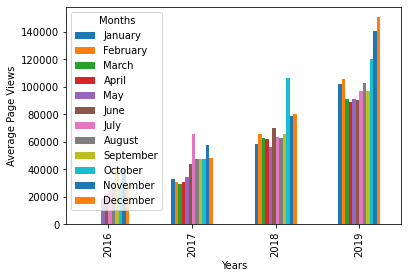

In [7]:
df['year'] = df.index.year
df['month'] = df.index.month

df_bar = df.groupby(by = ['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()

fig = df_bar.plot.bar(xlabel = 'Years', ylabel = 'Average Page Views').figure
plt.legend(['January','February','March ','April','May','June','July','August','September','October','November','December'], title = 'Months')

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

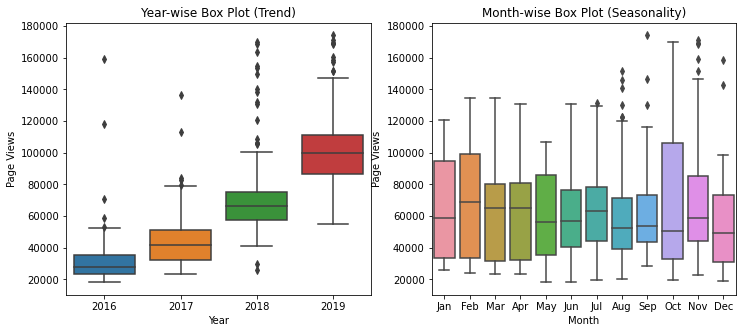

In [26]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
# Draw box plots (using Seaborn)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
pd.Categorical(df['month'], categories=months, ordered=True)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axis[0] = sns.boxplot(x = 'year', y = 'value', data = df_box, ax = axis[0])
axis[1] = sns.boxplot(x = 'month', y = 'value', data = df_box, ax = axis[1], order =  ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

axis[0].set_xlabel('Year')
axis[0].set_ylabel('Page Views')
axis[0].set_title('Year-wise Box Plot (Trend)')
    
axis[1].set_xlabel('Month')
axis[1].set_ylabel('Page Views')
axis[1].set_title('Month-wise Box Plot (Seasonality)')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1229    NaN
1230    NaN
1231    NaN
1232    NaN
1233    NaN
Name: month, Length: 1234, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

0       May
1       May
2       May
3       May
4       May
       ... 
1229    Nov
1230    Nov
1231    Nov
1232    Dec
1233    Dec
Name: month, Length: 1234, dtype: object

In [ ]:
# 